# INTRODUCTION TO COMPUTER SCIENCE

Student id : xhtl74

Code for Answer 1 - Answer 7:

In [1]:
## the following line is just MAGIC ##############################################
## we need it to be able to draw images on the screen ############################
from medialib import *
import datetime
import time
from datetime import date
import pandas as pd
import numpy as np
initialize() # always the first instruction of the program
##################################################################################


##  each item of the list representing the background of each row
background=[['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X'],
            ['X','_','F','F','_','_','M','_','_','F','F','_','F','_','_','_','_','X'],
            ['X','F','_','_','M','_','M','F','_','_','F','_','_','M','_','E','F','X'],
            ['X','_','_','F','_','_','_','_','_','F','M','_','F','_','F','_','_','X'],
            ['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X']] 

collidables = 'X' ## the letters that the avatar cannot pass
monsters='M'## the letters that the avatar will dead when meeting it

## the first image is at (10,200)
x0=10
y0=200 
initialX=x0
initialY=y0

#each tile width is 30 and initial game point is 0
tileSize=30
gamepoint=0

#the initial location of the avatar
avatar_x=initialX + tileSize
avatar_y=initialY + tileSize

flag_monster=False
flag_exit=False
#reading the previous game scores
game_score_file=pd.read_excel("Game.xlsx")
game_latest_score=game_score_file.head(2)["Points"].array[0]
game_latest_timetaken=game_score_file.head(2)["TimeTaken"].array[0]
game_latest_date=game_score_file.head(2)["Date"].array[0]
last_game_details="Score: " + str(game_latest_score) + "  Date-Played: "+ str(game_latest_date) + "  Time taken: " + str(game_latest_timetaken)


#below functions converts x and y avatar positions on screen to match avatar positions in background list
def convert_screenX_to_gridX(screenXPosition):
    global initialX
    return int((screenXPosition-initialX)/tileSize)

def convert_screenY_to_gridY(screenYPosition):
    global initialY
    return int((screenYPosition-initialY)/tileSize)



#Function to update avatar after kitten reaches food,Monster and Exit
def update_grid(grid,avatar_x,avatar_y):
    global tileSize
    gridx=convert_screenX_to_gridX(avatar_x)
    gridy=convert_screenY_to_gridY(avatar_y)
        
    if grid[gridy][gridx]=='M':
        clear()
        global flag_monster
        flag_monster=True
    elif grid[gridy][gridx]=='E':
        clear()
        global flag_exit
        flag_exit=True
        text("Congratulations! You Won! ", 10,550,16)
       
    
#Function to update Points after kitten eats fishes
    
def check_player_collected_fish(grid,avatar_x,avatar_y):
    global tileSize
    gridx=convert_screenX_to_gridX(avatar_x)
    gridy=convert_screenY_to_gridY(avatar_y)
    if grid[gridy][gridx]=='F':
        grid[gridy][gridx]='_'
        global gamepoint
        gamepoint+=1

#Function to draw the background and the avatar
def draw_scene(grid):
    global avatar_x
    global avatar_y
    global initialX
    global initialY
    tileY=initialY
    
    for j in range(len(grid)):
        tileX=initialX    
        for i in grid[j]:
            if i=='X':
                draw('MazeGame_imgs\X.png',tileX,tileY)
            elif i=='M':
                draw('MazeGame_imgs\M.png',tileX,tileY)
            elif i=='F':
                draw('MazeGame_imgs\F.png',tileX,tileY)
            elif i=='E':
                draw('MazeGame_imgs\E.png',tileX,tileY)
            elif i=='_':
                draw('MazeGame_imgs\_.png',tileX,tileY)           
            tileX+=tileSize
        tileY+=tileSize
        
    draw('MazeGame_imgs\C.png',avatar_x,avatar_y)
    text("Points: "+ str(gamepoint), 10,150,16)

    
def on_successfull_move_command(grid):
    global avatar_x
    global avatar_y
    check_player_collected_fish(grid,avatar_x,avatar_y)
    update_grid(grid,avatar_x,avatar_y)
    
def check_move_is_valid(potentialNewCatX, potentialNewCatY):  
    gridx=convert_screenX_to_gridX(potentialNewCatX)
    gridy=convert_screenY_to_gridY(potentialNewCatY)
    gridx=int((potentialNewCatX-10)/tileSize)
    
    # this checks if the next move is out of bounds on the multi dimensional array
    # it checks the Y value first to short circuit if the values are out of bounds before checking the inner part of the array
    if(gridy < 0 or gridy >= len(background) or gridx < 0 or gridx >= len(background[gridy])):
        text("Out of bounds illegal move", 10,370,16)
        return False
    
    if background[gridy][gridx]=='X':
        text("Hit a wall cant move further", 10,370,16)
        return False
    
    return True

def move_command(grid,newXPosition, newYPosition):
    global avatar_x
    global avatar_y
    if(check_move_is_valid(newXPosition, newYPosition)):
        #apply valid move to the global player position
        avatar_x=newXPosition
        avatar_y=newYPosition
        on_successfull_move_command(grid)
        
        
#Function for moving the avatar and updating grid and points

def game_command(grid): 
    draw_scene(grid)

    while flag_exit==False and flag_monster==False:
        text('Maze game',300,100,20)
        text('You are a lost cat, and have to find your way back home...',10,500,16)
        text('reach the door to leave this level and get closer to home!',10,520,16)
        text('To play: press a and d keys to move left and right',10,540,16)
        text('         press w and s keys to move upwards and downwards',10,560,16)
        text('         press q to quit the game',10,580,16)
        #print(game_latest_score)
        text("Previous game score", 10,430,16)
        text(str(last_game_details), 10,450,16)
        
        
        
        userinput = wait_key_press()
        clear()
        
    ## check and react to input
        if userinput=='a':
            move_command(grid,avatar_x-tileSize, avatar_y)
        elif userinput=='d':  
            move_command(grid,avatar_x+tileSize, avatar_y)     
        elif userinput=='w':
            move_command(grid,avatar_x, avatar_y-tileSize)
        elif userinput=='s':
            move_command(grid,avatar_x, avatar_y+tileSize)
        elif userinput=='q':
            text("Game Over", 10,450,16)
            
            #clear()
            break
        else:
            text("This is a illegal input!!!", 10,410,16)
    
        draw_scene(grid)
    
        
        if flag_exit==True:
            draw('MazeGame_imgs\you_win.png',100,50)
        if flag_monster==True:
            text("Game Over", 10,450,16)
           
        
       




    
starttime=datetime.datetime.now()
game_command(background)
text("Left click to exit", 10,470,16)
endtime=datetime.datetime.now() 
dateofgamecompletion=date.today()
#calculating time to complete the game 
time_diff=endtime-starttime
#writing game details to excel sheet

data=pd.DataFrame({'Points':[gamepoint],'Date':[dateofgamecompletion],'TimeTaken':[time_diff.total_seconds()]})
game_score_file=data.append(game_score_file,ignore_index=True)
game_score_file.to_excel('Game.xlsx',index=False)

wait_mouse_leftclick()
all_done()

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\Users\Rajeev Kumar Badhwar\AppData\Local\Temp\ipykernel_22792\2195649777.py:210: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  game_score_file=data.append(game_score_file,ignore_index=True)


Answer 8:

In [2]:
game_score_file["Points"]=game_score_file["Points"].astype(int)
game_score_file["TimeTaken"]=game_score_file["TimeTaken"].astype(int)


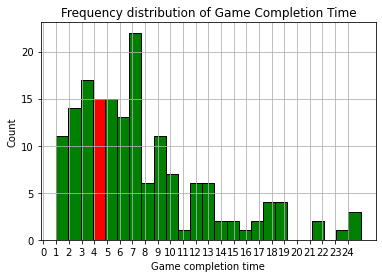

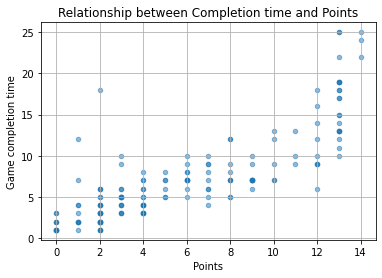

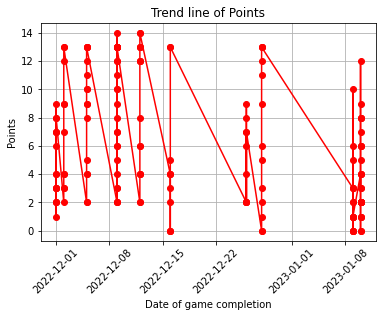

In [3]:
import matplotlib.pyplot as plt


#getting latest completion time for highlighting
game_latest_score=game_score_file.head(2)["Points"].array[0]
game_latest_timetaken=game_score_file.head(2)["TimeTaken"].array[0]
game_latest_date=game_score_file.head(2)["Date"].array[0]

n, bins, patches = plt.hist(game_score_file["TimeTaken"],edgecolor = 'black',bins=25,color='green')

patches[int(game_latest_timetaken)].set_fc("red")
plt.xlabel('Game completion time')
plt.ylabel('Count')
plt.title('Frequency distribution of Game Completion Time')
plt.xticks(np.arange(25))
plt.grid(True)
plt.show()

#scatter plot for game completion times against points
game_score_file.plot.scatter(x="Points", y="TimeTaken", alpha=0.5)
plt.xlabel('Points')
plt.ylabel('Game completion time')
plt.title('Relationship between Completion time and Points')
plt.grid(True)
plt.show()

#trend line for game scores:
plt.plot(game_score_file["Date"],game_score_file["Points"],'ro-')
plt.xticks(rotation = 45)
plt.xlabel('Date of game completion')
plt.ylabel('Points')
plt.title('Trend line of Points')
plt.grid(True)
plt.show()

Answer 9

# DATASET INFORMATION

Link for the dataset: https://archive.ics.uci.edu/ml/datasets/letter+recognition

About the dataset:
Letter Recognition Data Set is a handwritten digit dataset which is used identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.

Columns Used:
x-box horizontal position of box = Fish row position(fish_x)

y-box vertical position of box = Fish column position(fish_y)

width width of box = Monster row position(monster_x)

high height of box =Monster column position(monster(y)

Values between 1 and 3 have been slected for row positions of fishes and monsters and between 1 and 16 for column position for fishes and monsters.Duplicates have been removed and scaling has been done to ensure that game is solvable.


In [6]:
from medialib import *
import datetime
import time
import pandas as pd
import numpy as np
initialize()


## the first image is at (10,200)
x0=10
y0=200 
initialX=x0
initialY=y0

#each tile width is 30 and initial game point is 0
tileSize=30
gamepoint=0

#the initial location of the avatar
avatar_x=initialX + tileSize
avatar_y=initialY + tileSize

flag_monster=False
flag_exit=False

#reading the previous game scores
game_score_file=pd.read_excel("Game.xlsx")
game_latest_score=game_score_file.tail(1)["Points"].array[0]

#reading dataset and scaling columns

df=pd.read_csv("letter-recognition.csv",header=None)
df=df.iloc[:,2:6]
df.columns=["fish_x","fish_y","monster_x","monster_y"]
df["fish_y1"]=df["fish_y"] * 2
df["monster_y1"]=df["monster_y"] + 7
df=df[df["fish_x"]!=df["monster_x"]]
df=df[df["fish_y1"]!=df["monster_y1"] ]

print(df["fish_y1"])
fish=df[ df["fish_x"].between(1,3) & df["fish_y1"].between(1,16) ]
monster=df[df["monster_x"].between(1,3) & df["monster_y1"].between(1,16) ]
monster=monster[["monster_x","monster_y1"]]
monster=monster.drop_duplicates()


fish=fish[["fish_x","fish_y1"]]
fish=fish.drop_duplicates()
fish=fish.sample(n=11,random_state=250) 
monster=monster.sample(n=5,random_state=225)
print(fish)
print(monster)
fish=fish.to_numpy()
monster=monster.to_numpy()

#creating new background
background=[['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X'],
            ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','X'],
            ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','E','_','X'],
            ['X','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','_','X'],
            ['X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X','X']] 

for x,y in fish:
    background[x][y]='F'
for x,y in monster:
    background[x][y]='M' 
starttime=datetime.datetime.now()
game_command(background)
text("Left click to exit", 10,470,16)
endtime=datetime.datetime.now() 
dateofgamecompletion=date.today()
#calculating time to complete the game 
time_diff=endtime-starttime
#writing game details to excel sheet

data=pd.DataFrame({'Points':[gamepoint],'Date':[dateofgamecompletion],'TimeTaken':[time_diff.total_seconds()]})
print(data)
game_score_file=data.append(game_score_file,ignore_index=True)
game_score_file.to_excel('Game.xlsx',index=False)

wait_mouse_leftclick()
all_done()

0         6
1         6
2        12
3        12
6        10
         ..
19991    10
19993     6
19995     6
19996    16
19999    12
Name: fish_y1, Length: 16296, dtype: int64
      fish_x  fish_y1
574        1        8
20         3        4
142        1        4
4453       2       14
8          2        8
7468       3       12
64         3        8
7          1        6
30         3        6
1079       1        2
19         2        6
      monster_x  monster_y1
67            2           9
968           2           7
1628          2          10
1280          3           7
16            3           9
   Points        Date  TimeTaken
0       0  2023-01-10   3.760889


C:\Users\Rajeev Kumar Badhwar\AppData\Local\Temp\ipykernel_22792\4113592301.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  game_score_file=data.append(game_score_file,ignore_index=True)
